# A study on _Logistic Regression_ over scraped laptop data and their ratings.

## Part 1: Analyzing the data.

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [215]:
data_view = pd.DataFrame(pd.read_csv(r'C:/Users/elify/Documents//Github/logistic_regression.ipynb/dataset.csv', 
                                encoding='utf-8', sep=',', low_memory=False))
data_view.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand                 639 non-null    object 
 1   processor_brand       639 non-null    object 
 2   processor_type        639 non-null    object 
 3   processor_generation  639 non-null    object 
 4   ram_gb                639 non-null    int64  
 5   ram_type              639 non-null    object 
 6   ssd_gb                639 non-null    int64  
 7   hdd_gb                639 non-null    int64  
 8   os                    639 non-null    object 
 9   bit                   639 non-null    int64  
 10  display               639 non-null    float64
 11  rating                639 non-null    float64
 12  recommend             639 non-null    int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 65.0+ KB


We need the non_numerical columns to not be understood as objects, but rather, categories. There is a special type of import again where this is mentioned.

In [216]:
data = pd.DataFrame(pd.read_csv(r'C:/Users/elify/Documents/GitHub/logistic_regression.ipynb/dataset.csv', 
                                encoding='utf-8', sep=',', low_memory=False, dtype={'brand': 'category',
                                                                                   'processor_brand': 'category',
                                                                                    'processor_type': 'category',
                                                                                    'processor_generation': 'category',
                                                                                    'ram_gb': 'float64',
                                                                                    'ram_type': 'category',
                                                                                    'ssd_gb': 'int64',
                                                                                    'hdd_gb': 'int64',
                                                                                    'os': 'category',
                                                                                    'bit': 'int64',
                                                                                    'display': 'float64',
                                                                                    'rating': 'float64'}))

In [217]:
data

,brand,processor_brand,processor_type,processor_generation,ram_gb,ram_type,ssd_gb,hdd_gb,os,bit,display,rating,recommend
0,HP,AMD,Ryzen 3,Unknown,8.0,DDR4,256,1024,Windows,64,15.60,4.3,0
1,ASUS,Intel,Core i3,10th,8.0,DDR4,512,0,Windows,64,15.60,4.3,0
2,ASUS,Intel,Core i3,10th,8.0,DDR4,0,1024,Windows,64,14.10,3.9,0
3,HP,Intel,Core i3,11th,8.0,DDR4,512,0,Windows,64,15.60,4.4,0
4,HP,Intel,Core i5,11th,8.0,DDR4,512,0,Windows,64,15.60,4.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,DELL,AMD,Ryzen 3,Unknown,8.0,DDR4,0,1024,Windows,64,14.96,3.1,0
635,Acer,Intel,Core i5,11th,16.0,DDR4,256,1024,Windows,64,14.00,3.4,0
636,APPLE,Apple,M1 Processor,Unknown,8.0,DDR4,512,0,Mac,64,13.30,4.7,1
637,DELL,Intel,Core i3,10th,8.0,DDR4,256,1024,Windows,64,15.60,2.9,0


In [218]:
data.describe()

,ram_gb,ssd_gb,hdd_gb,bit,display,rating,recommend
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,11.079812,508.394366,181.082942,60.594679,14.802911,2.951800,0.237872
std,4.603891,305.212924,389.942787,9.875560,0.995890,2.012561,0.426114
min,8.000000,0.000000,0.000000,32.000000,12.000000,0.000000,0.000000
25%,8.000000,256.000000,0.000000,64.000000,14.000000,0.000000,0.000000
50%,8.000000,512.000000,0.000000,64.000000,15.600000,4.200000,0.000000
75%,16.000000,512.000000,0.000000,64.000000,15.600000,4.400000,0.000000
max,32.000000,3072.000000,1024.000000,64.000000,17.300000,5.000000,1.000000


We check to see if it is imported as we wanted.

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   brand                 639 non-null    category
 1   processor_brand       639 non-null    category
 2   processor_type        639 non-null    category
 3   processor_generation  639 non-null    category
 4   ram_gb                639 non-null    float64 
 5   ram_type              639 non-null    category
 6   ssd_gb                639 non-null    int64   
 7   hdd_gb                639 non-null    int64   
 8   os                    639 non-null    category
 9   bit                   639 non-null    int64   
 10  display               639 non-null    float64 
 11  rating                639 non-null    float64 
 12  recommend             639 non-null    int64   
dtypes: category(6), float64(3), int64(4)
memory usage: 40.5 KB


In [220]:
features = ['brand','processor_brand','processor_type','processor_generation','ram_gb','ram_type','ssd_gb','hdd_gb','os','bit','display','rating']

Let's visualize the data with histograms.

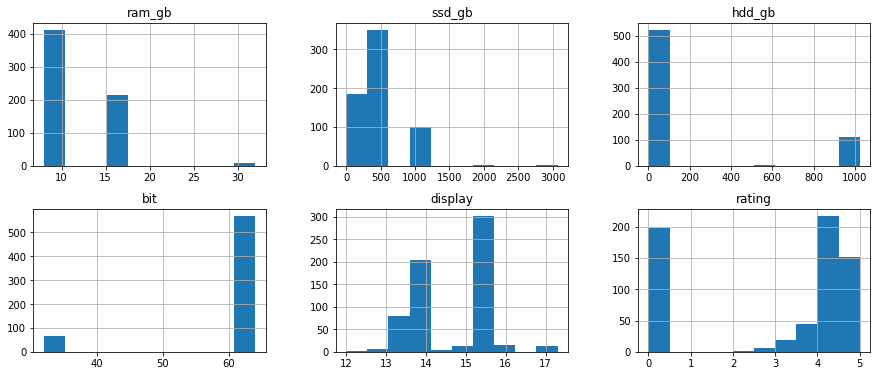

In [221]:
data[features].hist(figsize=(15,30),layout=(9,3));

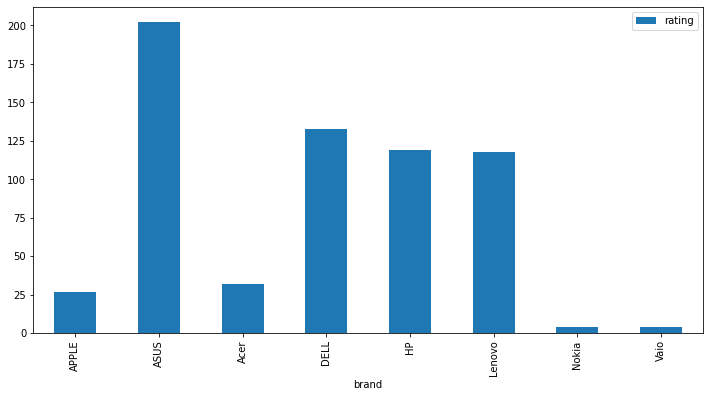

In [222]:
brand_group = pd.DataFrame(data.groupby(['brand'])['rating'].count().to_frame('rating'))

brand_group.plot.bar(figsize=(12,6));

## Part 2: Organizing the data

We will create dummy variables for the categorical features, so that these columns will only show 1 or 0 for every type in a category of features. This will come in handy later.

In [223]:
data = pd.get_dummies(data, columns=['brand', 'processor_brand', 'processor_type', 'processor_generation', 'os','ram_type'], dummy_na=False)

In [224]:
data

,ram_gb,ssd_gb,hdd_gb,bit,display,rating,recommend,brand_APPLE,brand_ASUS,brand_Acer,...,processor_generation_9th,processor_generation_Unknown,os_Mac,os_Windows,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,ram_type_Unified
0,8.0,256,1024,64,15.60,4.3,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
1,8.0,512,0,64,15.60,4.3,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,8.0,0,1024,64,14.10,3.9,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,8.0,512,0,64,15.60,4.4,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,8.0,512,0,64,15.60,4.2,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,8.0,0,1024,64,14.96,3.1,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
635,16.0,256,1024,64,14.00,3.4,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
636,8.0,512,0,64,13.30,4.7,1,1,0,0,...,0,1,1,0,1,0,0,0,0,0
637,8.0,256,1024,64,15.60,2.9,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


Let's create a correlation matrix to visually understand the data.

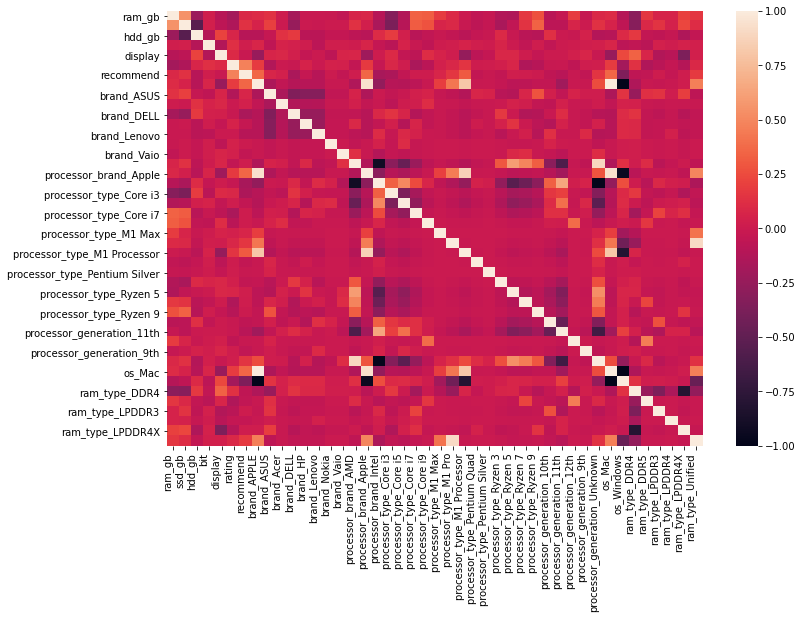

In [225]:
corr = data.corr(method='pearson')
corr.style.background_gradient(cmap='collwarm').set_properties(**{'font-size': '0pt'})

plt.figure(figsize = (12,8))

ax = sns.heatmap(
    corr
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

We can see that there is not many correlating features. We can move forward without the need to clean up the data.

## Part 3: Applying Logistic Regression

For this part an extra column is added to simplify the problem enough for logistic regression. All laptops that have a rating over 4.5 are marked with 1, others 0 for a recommendation column. Now onto the logistic regression with a train-test-split.

Data is split into the known and guessing values which are X and Y respectively

In [226]:
X = pd.DataFrame(data.drop(columns=['recommend']))
Y = data['recommend']

*train_test_split* function will be used. *test_size* has been chosen as *0.1* as per the request of the assignment. *stratify=Y* parameter indicates that the testing and training datas will be split into two taking into the account of having equal of both Y values on either side.

In [227]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, stratify=Y, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (575, 43) (575,)
Test set: (64, 43) (64,)


Now to find out the most optimal parameters for a regression model in this case.

In [228]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
space = dict() 
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear'] 
space['penalty'] = ['l2'] 
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100] 

LR = LogisticRegression() 
search = GridSearchCV(LR, space, scoring='accuracy', n_jobs=-1, cv=cv) 
result = search.fit(X_train, Y_train) 

print(result.best_score_)
print(result.best_params_)

0.9986085904416213
{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


C:\Users\elify\anaconda3\lib\site-packages\sklearn\utils\optimize.py:202: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


*C': 100, 'penalty': 'l2', 'solver': 'newton-cg'* parameters were suggested, but we have no obligation here. Out of spite, the solver has been changed. For training the function *fit()* will be used and then the models score will be evaluated.

In [229]:
LR = LogisticRegression(C=10, penalty='l2', solver='liblinear')

LR.fit(X_train, Y_train)

Y_prediction = LR.predict(X_test)

print("model score: %.3f" % LR.score(X_test, Y_test))

model score: 0.922


And onto the results, we create a confusion matrix.

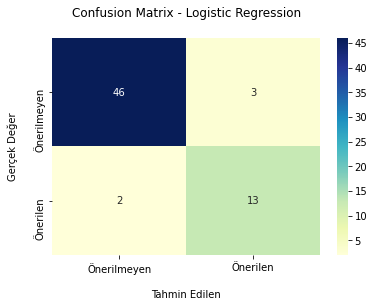

In [230]:
cm = confusion_matrix(Y_test, Y_prediction)

ax = sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu')

ax.set_title('Confusion Matrix - Logistic Regression\n');
ax.set_xlabel('\nTahmin Edilen')
ax.set_ylabel('Gerçek Değer/n');

ax.set_ylim([2,0])

ax.xaxis.set_ticklabels(['Önerilmeyen','Önerilen'])
ax.yaxis.set_ticklabels(['Önerilmeyen','Önerilen'])

plt.show()

### Conclusion: From the recommended laptops, 13 were guessed correctly and there were 2 misses. From the not recommended laptops, 46 were correctly guessed and 3 were incorrectly guessed.

All that is left to do would be to export the data.

In [232]:
result = pd.concat([X_test, Y_test], axis=1)
result["Y_prediction"]=Y_prediction
result

,ram_gb,ssd_gb,hdd_gb,bit,display,rating,brand_APPLE,brand_ASUS,brand_Acer,brand_DELL,...,os_Mac,os_Windows,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,ram_type_Unified,recommend,Y_prediction
634,8.0,0,1024,64,14.96,3.1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
480,8.0,512,0,64,15.60,4.5,0,1,0,0,...,0,1,1,0,0,0,0,0,1,1
465,8.0,512,0,64,15.60,4.1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
269,16.0,1024,0,64,13.00,4.8,1,0,0,0,...,1,0,0,0,0,0,1,0,1,1
30,8.0,256,0,64,14.00,4.3,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,16.0,512,0,64,14.00,3.5,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
441,8.0,256,1024,32,15.60,0.0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
253,8.0,0,1024,32,15.60,0.0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
201,8.0,256,0,64,14.00,4.4,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [233]:
result.to_csv(r'C:/Users/elify/Documents/GitHub/logistic_regression.ipynb/results/LogisticRegressionResults.csv', index=False)

## Extra: Logistic Regression after an application of Normalization

This part is basically a redo of the entire study but aims to observe if applying a normalization to data beforehand would make any difference. 

In [234]:
numeric_features = ['ram_gb','ssd_gb','hdd_gb','bit','display','rating']
for i in numeric_features:
    data[i] = (data[i]-data[i].min())/(data[i].max()-data[i].min())
data[numeric_features].describe()

,ram_gb,ssd_gb,hdd_gb,bit,display,rating
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,0.128326,0.165493,0.176839,0.893584,0.528851,0.590360
std,0.191829,0.099353,0.380804,0.308611,0.187904,0.402512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.083333,0.000000,1.000000,0.377358,0.000000
50%,0.000000,0.166667,0.000000,1.000000,0.679245,0.840000
75%,0.333333,0.166667,0.000000,1.000000,0.679245,0.880000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now a repeat of the regression above.

In [235]:
X = pd.DataFrame(data.drop(columns=['recommend']))
Y = data['recommend']

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.1, stratify=Y, random_state=42)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (575, 43) (575,)
Test set: (64, 43) (64,)


In [236]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
space = dict() 
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear'] 
space['penalty'] = ['l2'] 
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100] 

LR = LogisticRegression() 
search = GridSearchCV(LR, space, scoring='accuracy', n_jobs=-1, cv=cv) 
result = search.fit(X_train, Y_train) 

print(result.best_score_)
print(result.best_params_)

0.9645674531155476
{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [237]:
LR = LogisticRegression(C=10, penalty='l2', solver='lbfgs')

LR.fit(X_train, Y_train)

Y_prediction = LR.predict(X_test)

print("model score: %.3f" % LR.score(X_test, Y_test))

model score: 0.922


C:\Users\elify\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


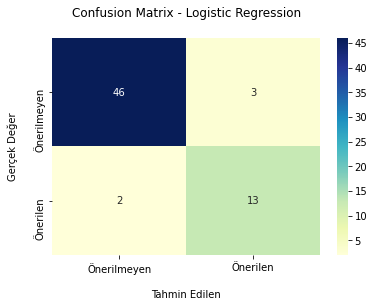

In [238]:
cm = confusion_matrix(Y_test, Y_prediction)

ax = sns.heatmap(cm, annot=True, fmt='', cmap='YlGnBu')

ax.set_title('Confusion Matrix - Logistic Regression\n');
ax.set_xlabel('\nTahmin Edilen')
ax.set_ylabel('Gerçek Değer\n');

ax.set_ylim([2,0])

ax.xaxis.set_ticklabels(['Önerilmeyen','Önerilen'])
ax.yaxis.set_ticklabels(['Önerilmeyen','Önerilen'])

plt.show()

No change was observed. We look at and then export the results.

In [239]:
result_normalized = pd.concat([X_test, Y_test], axis=1)
result_normalized["Y_prediction"]=Y_prediction
result_normalized

,ram_gb,ssd_gb,hdd_gb,bit,display,rating,brand_APPLE,brand_ASUS,brand_Acer,brand_DELL,...,os_Mac,os_Windows,ram_type_DDR4,ram_type_DDR5,ram_type_LPDDR3,ram_type_LPDDR4,ram_type_LPDDR4X,ram_type_Unified,recommend,Y_prediction
634,0.000000,0.000000,1.0,1.0,0.558491,0.62,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
480,0.000000,0.166667,0.0,1.0,0.679245,0.90,0,1,0,0,...,0,1,1,0,0,0,0,0,1,1
465,0.000000,0.166667,0.0,1.0,0.679245,0.82,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
269,0.333333,0.333333,0.0,1.0,0.188679,0.96,1,0,0,0,...,1,0,0,0,0,0,1,0,1,1
30,0.000000,0.083333,0.0,1.0,0.377358,0.86,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,0.333333,0.166667,0.0,1.0,0.377358,0.70,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
441,0.000000,0.083333,1.0,0.0,0.679245,0.00,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
253,0.000000,0.000000,1.0,0.0,0.679245,0.00,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
201,0.000000,0.083333,0.0,1.0,0.377358,0.88,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [240]:
result_normalized.to_csv(r'C:/Users/elify/Documents/GitHub/logistic_regression.ipynb/results/LogisticRegressionResultsNormalized.csv', index=False)